# Análise dos resultados parciais da extração

## Pré-processamento

Tratando datas e tipos de dados

In [1]:
import pandas as pd
import matplotlib as plt
import plotly

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 4)

In [3]:
repo = pd.read_csv("../data/repositories_1580334605.csv",  dtype={'id': object,
                                                                'timestamp_extract': object,
                                                                'commits': pd.Int64Dtype(),
                                                                'contributors': pd.Int64Dtype()})

In [4]:
repo.describe()

,forks,forks_count,open_issues,size,stargazers_count,commits,contributors
count,445.000000,445.000000,445.000000,445.000000,445.000000,428.000000,428.000000
mean,0.802247,0.802247,0.961798,9735.101124,2.752809,72.238318,2.088785
std,3.333760,3.333760,10.072524,42848.278656,12.182435,915.639408,15.097391
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,23.000000,0.000000,3.000000,1.000000
50%,0.000000,0.000000,0.000000,350.000000,0.000000,8.000000,1.000000
75%,0.000000,0.000000,0.000000,3295.000000,1.000000,24.000000,1.000000
max,44.000000,44.000000,209.000000,555527.000000,141.000000,18911.000000,313.000000


In [5]:
repo.head(3)[['id', 'url', 'created_at', 'updated_at', 'pushed_at']]

,id,url,created_at,updated_at,pushed_at
0,29256552,https://github.com/CamaraDosDeputados/dados-ab...,2015-01-14T17:32:49Z,2020-01-23T14:21:59Z,2019-12-13T15:13:19Z
1,39256926,https://github.com/dadosgovbr/catalogos-dados-...,2015-07-17T14:02:34Z,2020-01-19T19:44:00Z,2019-12-02T18:58:47Z
2,73385196,https://github.com/prefeiturasp/dados-educacao,2016-11-10T13:35:40Z,2019-08-17T00:49:49Z,2019-10-02T18:43:26Z


In [6]:
def conversao_string_datetime(df, coluna):
    df[coluna] = pd.to_datetime(df[coluna], dayfirst=True)
    
    df[coluna + '_mes'] = df[coluna].dt.month_name(locale='pt_BR.UTF-8')
    df.astype({coluna + '_mes': 'category'}).dtypes

    df[coluna + '_mes_numero'] = df[coluna].dt.month
    df.astype({coluna + '_mes_numero': 'category'}).dtypes

    df[coluna + '_ano'] = df[coluna].dt.year
    df.astype({coluna + '_ano': 'category'}).dtypes

    # df[coluna + '_dia'] = df[coluna].dt.day

    return df

In [7]:
repo = conversao_string_datetime(repo, 'created_at')
repo = conversao_string_datetime(repo, 'updated_at')
repo = conversao_string_datetime(repo, 'pushed_at')

repo.head(1)

,api_url,created_at,description,fork,forks,forks_count,full_name,has_issues,has_wiki,id,...,owner_name,created_at_mes,created_at_mes_numero,created_at_ano,updated_at_mes,updated_at_mes_numero,updated_at_ano,pushed_at_mes,pushed_at_mes_numero,pushed_at_ano
0,https://api.github.com/repos/CamaraDosDeputado...,2015-01-14 17:32:49+00:00,Repositório do serviço de Dados Abertos da Câm...,False,7,7,CamaraDosDeputados/dados-abertos,True,True,29256552,...,Câmara dos Deputados do Brasil,Janeiro,1,2015,Janeiro,1,2020,Dezembro,12.0,2019.0


In [8]:
len(repo)

445

In [9]:
len(repo.loc[repo['commits'].isna()])

17

Após verificação manual, podemos afirmar que aqueles repositórios que estão com commits zerados realmente estão vazios. Por isso, serão retirados no conjunto de análise.

In [10]:
repo = repo.dropna(subset=['commits'])
len(repo)

428

## Agrupando dados

In [11]:
repo.columns

Index(['api_url', 'created_at', 'description', 'fork', 'forks', 'forks_count',
       'full_name', 'has_issues', 'has_wiki', 'id', 'language', 'license',
       'open_issues', 'owner_api_url', 'owner_type', 'owner_url', 'pushed_at',
       'size', 'stargazers_count', 'timestamp_extract', 'updated_at', 'url',
       'commits', 'contributors', 'owner_location', 'owner_email',
       'owner_blog', 'owner_name', 'created_at_mes', 'created_at_mes_numero',
       'created_at_ano', 'updated_at_mes', 'updated_at_mes_numero',
       'updated_at_ano', 'pushed_at_mes', 'pushed_at_mes_numero',
       'pushed_at_ano'],
      dtype='object')

### Tipos de usuários do github

In [12]:
repo.groupby('owner_type').size().reset_index(name='Quantidade')

,owner_type,Quantidade
0,Organization,86
1,User,342


### Linguagens de Programação

In [13]:
repo.groupby('language').size().reset_index(name='Quantidade').sort_values('Quantidade', ascending=False)

,language,Quantidade
15,Python,68
10,Jupyter Notebook,54
9,JavaScript,54
8,Java,24
7,HTML,24
16,R,21
14,PHP,20
18,Ruby,11
4,CSS,11
22,TypeScript,9


### Quantidade de _Stars_ 

Top 15

In [14]:
stargazers_count = repo[['full_name', 'stargazers_count']]

In [15]:
stargazers_count.sort_values('stargazers_count',  ascending=False).head(10)

,full_name,stargazers_count
0,CamaraDosDeputados/dados-abertos,141
1,dadosgovbr/catalogos-dados-brasil,139
393,chapeupreto/sinesp,121
2,prefeiturasp/dados-educacao,48
3,dadosgovbr/aplicativos-dados-brasil,48
4,mapaslivres/localidades,41
5,dadosgovbr/kit,39
6,brasilopen/brasilopen,29
394,sjcdigital/repasse-server,29
7,odufrn/odufrn-downloader,28


### Commits
Top 15

In [16]:
commits_count = repo[['full_name', 'commits']]

In [17]:
commits_count.sort_values('commits',  ascending=False).head(10)

,full_name,commits
364,decosoares/diariasservidoresalagoas,18911
52,planejamentoGovBr/PDA-institucional-MP,915
388,rodrigosantosbr/catmat_compras_gov,714
394,sjcdigital/repasse-server,401
5,dadosgovbr/kit,362
67,febr-team/febr-package,346
127,Falnesio/Time-Tito,344
29,centraldedados/parlamento,287
444,NivSoft/transpy,260
7,odufrn/odufrn-downloader,237


### Quantidade de Forks

In [18]:
forks_count = repo[['full_name', 'forks_count']]

In [19]:
forks_count.sort_values('forks_count',  ascending=False).head(15)

,full_name,forks_count
393,chapeupreto/sinesp,44
1,dadosgovbr/catalogos-dados-brasil,40
2,prefeiturasp/dados-educacao,18
5,dadosgovbr/kit,14
4,mapaslivres/localidades,13
10,dadosgovbr/processo-participacao-social-inda,12
3,dadosgovbr/aplicativos-dados-brasil,9
35,danielmbicalho/Dados_repositorios_e_ferramentas,9
18,paulozip/acidentes-aereos,8
14,thefonseca/jogo-politico,7


### Local
A partir do campo _location_ do _owner_ do repositório - Top 15

In [20]:
len(repo.loc[repo['owner_location'].isna()])

162

In [21]:
repo['owner_location'] = repo['owner_location'].fillna("Não Informado")

In [22]:
repo['owner_location']

0                      Brazil
1                      Brazil
2               São Paulo, SP
3                      Brazil
4               Não Informado
                ...          
440    Fortaleza - CE, Brazil
441              Fortaleza-CE
442             Não Informado
443             Não Informado
444        Recife/PE - Brasil
Name: owner_location, Length: 428, dtype: object

In [23]:
salvador = repo[repo['owner_location'].str.contains('salvador', case=False)]['id'].values
repo.loc[repo['id'].isin(salvador), 'owner_location'] = 'Salvador'

belo_horizonte = repo[repo['owner_location'].str.contains('belo horizonte', case=False)]['id'].values
repo.loc[repo['id'].isin(belo_horizonte), 'owner_location'] = 'Belo Horizonte'

berlin = repo[repo['owner_location'].str.contains('berlin', case=False)]['id'].values
repo.loc[repo['id'].isin(berlin), 'owner_location'] = 'Berlin'

brasilia = repo[repo['owner_location'].str.contains('brasilia', case=False)]['id'].values
repo.loc[repo['id'].isin(brasilia), 'owner_location'] = 'Brasília'

campina_grande = repo[repo['owner_location'].str.contains('campina grande', case=False)]['id'].values
repo.loc[repo['id'].isin(campina_grande), 'owner_location'] = 'Campina Grande'

campinas = repo[repo['owner_location'].str.contains('campinas', case=False)]['id'].values
repo.loc[repo['id'].isin(campinas), 'owner_location'] = 'Campinas'

curitiba = repo[repo['owner_location'].str.contains('curitiba', case=False)]['id'].values
repo.loc[repo['id'].isin(curitiba), 'owner_location'] = 'Curitiba'

duque_de_caxias = repo[repo['owner_location'].str.contains('duque de caxias', case=False)]['id'].values
repo.loc[repo['id'].isin(duque_de_caxias), 'owner_location'] = 'Duque de Caxias'

florianopolis = repo[repo['owner_location'].str.contains('florianópolis', case=False)]['id'].values
repo.loc[repo['id'].isin(florianopolis), 'owner_location'] = 'Florianópolis'

fortaleza = repo[repo['owner_location'].str.contains('fortaleza', case=False)]['id'].values
repo.loc[repo['id'].isin(fortaleza), 'owner_location'] = 'Fortaleza'

joao_pessoa = repo[repo['owner_location'].str.contains('joão pessoa', case=False)]['id'].values
repo.loc[repo['id'].isin(joao_pessoa), 'owner_location'] = 'João Pessoa'

juiz_de_fora = repo[repo['owner_location'].str.contains('juiz de fora', case=False)]['id'].values
repo.loc[repo['id'].isin(juiz_de_fora), 'owner_location'] = 'Juiz de Fora'

natal = repo[repo['owner_location'].str.contains('natal', case=False)]['id'].values
repo.loc[repo['id'].isin(natal), 'owner_location'] = 'Natal'

porto_alegre = repo[repo['owner_location'].str.contains('porto alegre', case=False)]['id'].values
repo.loc[repo['id'].isin(porto_alegre), 'owner_location'] = 'Porto Alegre'

recife = repo[repo['owner_location'].str.contains('recife', case=False)]['id'].values
repo.loc[repo['id'].isin(recife), 'owner_location'] = 'Recife'

sao_carlos = repo[repo['owner_location'].str.contains('são carlos', case=False)]['id'].values
repo.loc[repo['id'].isin(sao_carlos), 'owner_location'] = 'São Carlos'

salto = repo[repo['owner_location'].str.contains('salto', case=False)]['id'].values
repo.loc[repo['id'].isin(juiz_de_fora), 'owner_location'] = 'Salto'

sao_jose_dos_campos = repo[repo['owner_location'].str.contains('são josé dos campos', case=False)]['id'].values
repo.loc[repo['id'].isin(salto), 'owner_location'] = 'São José dos Campos'

sao_luiz = repo[repo['owner_location'].str.contains('são luís', case=False)]['id'].values
repo.loc[repo['id'].isin(sao_luiz), 'owner_location'] = 'São Luís'

vitoria = repo[repo['owner_location'].str.contains('vitória', case=False)]['id'].values
repo.loc[repo['id'].isin(vitoria), 'owner_location'] = 'Vitória'

In [24]:
repo.groupby('owner_location').size().reset_index(name='Quantidade').sort_values('Quantidade', ascending=False).head(15)

,owner_location,Quantidade
60,Não Informado,162
21,Brazil,39
7,Brasil,13
57,Natal,12
3,Belo Horizonte,12
84,São Paulo,11
70,Recife,11
42,Fortaleza,9
81,São José dos Campos,7
27,Campina Grande,7


### Criação e atualização dos repositórios

In [29]:
created_repo = repo[['full_name', 'created_at_ano']]
created_by_year = created_repo.groupby('created_at_ano').size().reset_index(name='quantidade').sort_values('created_at_ano')
created_by_year

,created_at_ano,quantidade
0,2010,1
1,2011,1
2,2012,10
3,2013,19
4,2014,28
5,2015,32
6,2016,50
7,2017,61
8,2018,103
9,2019,115


In [30]:
pushed_repo = repo[['full_name', 'pushed_at_ano']]
pushed_by_year = pushed_repo.groupby('pushed_at_ano').size().reset_index(name='quantidade').sort_values('pushed_at_ano')
pushed_by_year

,pushed_at_ano,quantidade
0,2010.0,1
1,2011.0,1
2,2012.0,5
3,2013.0,20
4,2014.0,20
5,2015.0,25
6,2016.0,44
7,2017.0,52
8,2018.0,94
9,2019.0,141


Text(0, 0.5, 'Quantidade de repositórios')

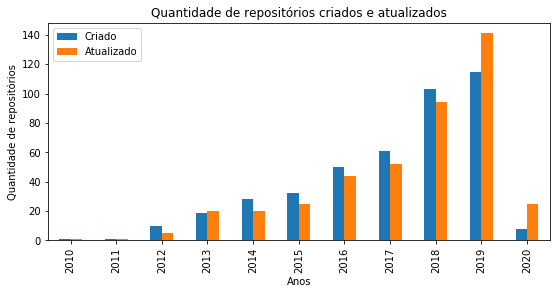

In [35]:
created_pushed = pd.DataFrame({'Criado': created_by_year['quantidade'].values, 
                   'Atualizado': pushed_by_year['quantidade'].values}, index=created_by_year['created_at_ano'])

ax = created_pushed.plot.bar(title = "Quantidade de repositórios criados e atualizados")
ax.set_xlabel("Anos")
ax.set_ylabel("Quantidade de repositórios")

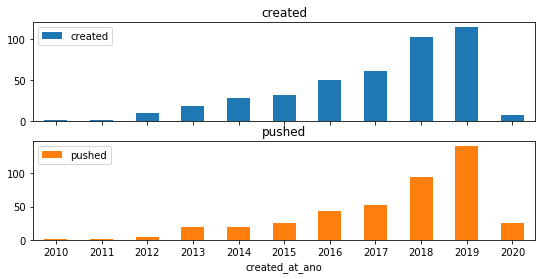

In [32]:
axes = created_pushed.plot.bar(rot=0, subplots=True)

axes[1].legend(loc=2) 